In [1]:
import sys

In [ ]:
!mkdir data/processed/
!mkdir data/synthetic/
!mkdir results/

## Combine Chromosome

In [3]:
!plink --bfile data/raw/1KGPhase3.w_hm3.chr1 --merge-list data/merge_list.txt --make-bed --out data/processed/chr_merged

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/processed/chr_merged.log.
Options in effect:
  --bfile data/raw/1KGPhase3.w_hm3.chr1
  --make-bed
  --merge-list data/merge_list.txt
  --out data/processed/chr_merged

8095 MB RAM detected; reserving 4047 MB for main workspace.
Performing single-pass merge (2504 people, 1330820 variants).

Pass 1: fileset #1 complete.
Pass 1: fileset #2 complete.
Pass 1: fileset #3 complete.
Pass 1: fileset #4 complete.
Pass 1: fileset #5 complete.
Pass 1: fileset #6 complete.
Pass 1: fileset #7 complete.
Pass 1: fileset #8 complete.
Pass 1: fileset #9 complete.
Pass 1: fileset #10 complete.
Pass 1: fileset #11 complete.
Pass 1: fileset #12 complete.
Pass 1: fileset #13 complete.
Pass 1: fileset #14 complete.
Pass 1: fileset #15 complete.
Pass 1: fileset #16 complete.
Pass 1: fileset #17 complete.
Pass 1: fileset #18 complete.
Pass

## Quality Control Criteria

| Checks | Value | PLINK command |
| -- | -- | -- | 
| Missingness per SNP | 0.1 | --geno |
| Missingness per individual | 0.1 | --mind |
| Minor allele frequency | 0.05 | --maf |
| Hardy-Weinberg threhold  | 0.0000001 | --hwe |

In [2]:
!plink --bfile data/processed/chr_merged --geno 0.1 --make-bed --out data/processed/chr_after_qc

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/processed/chr_after_qc.log.
Options in effect:
  --bfile data/processed/chr_merged
  --geno 0.1
  --make-bed
  --out data/processed/chr_after_qc

8095 MB RAM detected; reserving 4047 MB for main workspace.
1330820 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to data/processed/chr_after_qc.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999896.
299 variants removed due to missing genotype data (--geno).
1330521

In [3]:
!plink --bfile data/processed/chr_merged --geno 0.1 --mind 0.1 --maf 0.05 --hwe 10e-6 --make-bed --out data/processed/chr_after_qc_complete

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/processed/chr_after_qc_complete.log.
Options in effect:
  --bfile data/processed/chr_merged
  --geno 0.1
  --hwe 10e-6
  --maf 0.05
  --make-bed
  --mind 0.1
  --out data/processed/chr_after_qc_complete

8095 MB RAM detected; reserving 4047 MB for main workspace.
1330820 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to data/processed/chr_after_qc_complete.nosex .
0 people removed due to missing genotype data (--mind).
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919

## Genetic Distance Between Individuals

`--distance-matrix`:
- What it does:
  - Calculates a pairwise genetic distance matrix between all individuals in the dataset.
  - The genetic distance can be based on IBS (Identity by State) or other metrics, depending on your dataset.
- Output:
  - A file containing a symmetric matrix of pairwise distances between individuals.
  - The values indicate how genetically similar or dissimilar individuals are.
- Use cases:
  - Clustering individuals into groups based on genetic similarity (e.g., hierarchical clustering, multidimensional scaling).
  - Visualizing genetic similarity/dissimilarity in a non-parametric way (e.g., using heatmaps or dendrograms).

**Visualizing Genetic Similarity/Dissimilarity**:

Use `--distance-matrix` for alternative clustering methods or heatmaps.

The distance matrix is more flexible for non-PCA-based clustering methods, such as:
1. Hierarchical clustering (e.g., dendrograms).
2. Multidimensional scaling (MDS).
3. Heatmaps showing pairwise genetic similarity.

This approach can complement PCA but is less standard for ancestry visualization.

In [7]:
!plink --bfile data/processed/chr_after_qc_complete --distance-matrix --out results/distance_matrix

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to results/distance_matrix.log.
Options in effect:
  --bfile data/processed/chr_after_qc_complete
  --distance-matrix
  --out results/distance_matrix

8095 MB RAM detected; reserving 4047 MB for main workspace.
689491 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to results/distance_matrix.nosex .
Using up to 4 threads (change this with --threads).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999932.
689491 variants and 2504 people pass filters and QC.
Note: No phenotypes presen

## Population Structure Analysis

`--pca`
- What it does:
  - Performs Principal Component Analysis (PCA) on the genetic data.
  - PCA reduces the high-dimensional genotype data into a smaller number of principal components (PCs) that capture most of the variation.
- Output:
  - A file containing the eigenvectors (PC coordinates) for each individual.
  - A file containing the eigenvalues (amount of variation explained by each PC).
- Use cases:
  - Identifying population structure and stratification.
  - Visualizing ancestry and genetic relationships in 2D or 3D scatterplots (PC1 vs. PC2, etc.).
  - Correcting for population stratification in GWAS (e.g., by including PCs as covariates).

**Visualizing Ancestry and Population Structure**: 

Use `--pca` for ancestry and PCA visualization.

- The PCA results are ideal for plotting the genetic structure of your population in a reduced-dimensional space.
- By plotting the first two or three principal components (e.g., PC1 vs. PC2), you can visualize clustering patterns that reflect population ancestry or substructure.
- PCA is widely used in population genetics for this purpose because it captures the major axes of genetic variation.

In [6]:
!plink --bfile data/processed/chr_after_qc_complete --pca --out results/pca_analysis

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to results/pca_analysis.log.
Options in effect:
  --bfile data/processed/chr_after_qc_complete
  --out results/pca_analysis
  --pca

8095 MB RAM detected; reserving 4047 MB for main workspace.
689491 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to results/pca_analysis.nosex .
Using up to 4 threads (change this with --threads).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999932.
689491 variants and 2504 people pass filters and QC.
Note: No phenotypes present.

60 markers comple

156780 markers complete.
156840 markers complete.
156900 markers complete.
156960 markers complete.
157020 markers complete.
157080 markers complete.
157140 markers complete.
157200 markers complete.
157260 markers complete.
157320 markers complete.
157380 markers complete.
157440 markers complete.
157500 markers complete.
157560 markers complete.
157620 markers complete.
157680 markers complete.
157740 markers complete.
157800 markers complete.
157860 markers complete.
157920 markers complete.
157980 markers complete.
158040 markers complete.
158100 markers complete.
158160 markers complete.
158220 markers complete.
158280 markers complete.
158340 markers complete.
158400 markers complete.
158460 markers complete.
158520 markers complete.
158580 markers complete.
158640 markers complete.
158700 markers complete.
158760 markers complete.
158820 markers complete.
158880 markers complete.
158940 markers complete.
159000 markers complete.
159060 markers complete.
159120 markers complete.


In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os

os.getcwd()

'c:\\D\\Kalbe\\GeneX\\Learning-Bioinformatics\\Genomics-Data-Analysis-Beginner'

In [7]:
# Set working directory (modify as needed)
working_dir = os.getcwd()
dist_file = working_dir + "/results/distance_matrix.mdist"
id_file = working_dir + "/results/distance_matrix.mdist.id"

# Load the distance matrix
dist_populations = pd.read_csv(dist_file, sep='\s+', header=None)

# Load individual and family IDs
fam = pd.read_csv(id_file, sep='\s+', header=None, usecols=[0], names=["famids"])
famInd = pd.read_csv(id_file, sep='\s+', header=None, usecols=[1], names=["IID"])

In [8]:
# Perform PCA using multidimensional scaling (equivalent to cmdscale in R)
# Principal Coordinate Analysis (PCoA)
from sklearn.manifold import MDS

# Perform MDS to get PCA-like eigenvalues and eigenvectors
mds = MDS(n_components=5, dissimilarity="precomputed", random_state=42)
mds_points = mds.fit_transform(dist_populations)

# Combine eigenvectors with family and individual IDs
eigenvec_populations = pd.DataFrame(mds_points, columns=[f'PC{i}' for i in range(1, 6)])
eigenvec_populations = pd.concat([fam, famInd, eigenvec_populations], axis=1)

# Calculate the proportion of variation (approximation using stress values)
eigen_percent = 100 * (mds.stress_ / np.sum(mds.stress_))

# this took 24m 13.4s

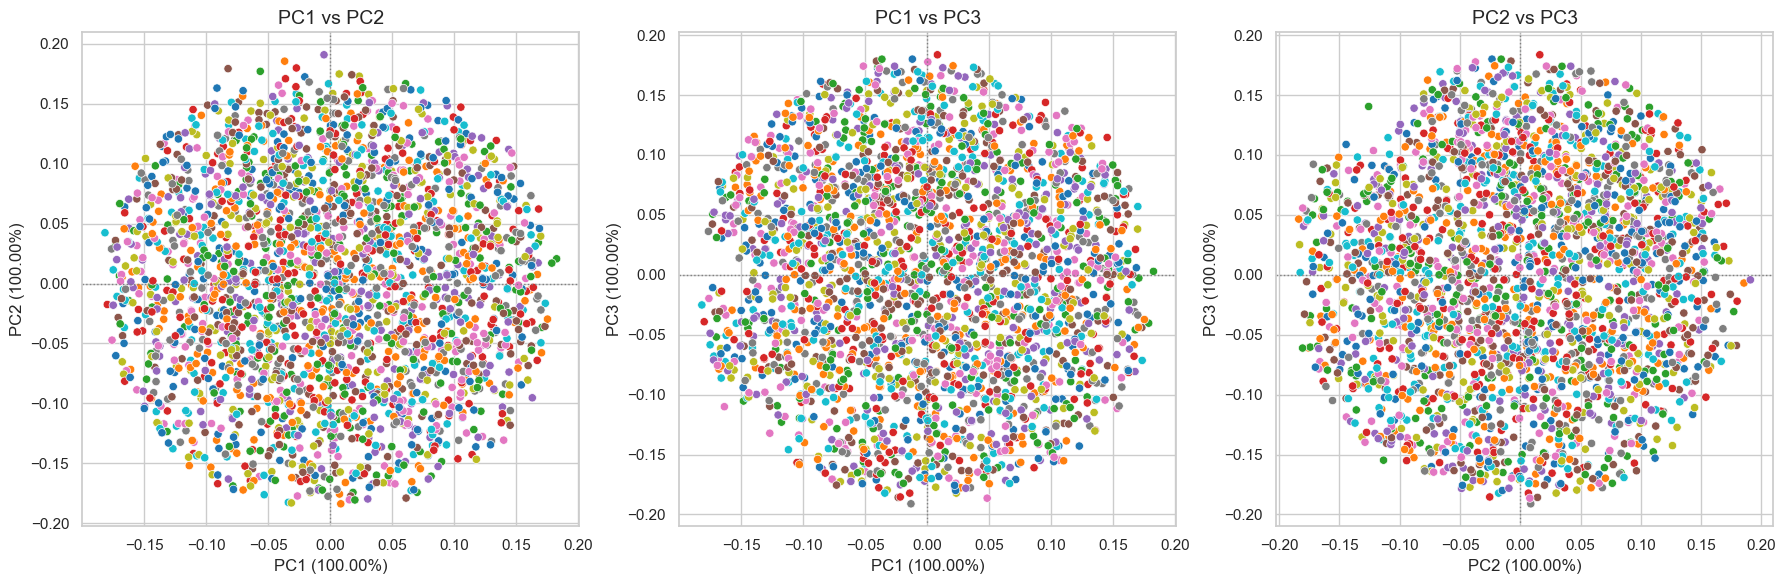

In [26]:
# Plotting PCA results with 3 subplots in 1 row
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with 3 subplots in 1 row

# PC1 vs PC2
sns.scatterplot(
    data=eigenvec_populations,
    x='PC1', y='PC2', hue='famids', palette='tab10', legend=False,
    ax=axes[0]
)
axes[0].axhline(0, linestyle='dotted', color='grey', linewidth=1)
axes[0].axvline(0, linestyle='dotted', color='grey', linewidth=1)
axes[0].set_title("PC1 vs PC2", fontsize=14)
axes[0].set_xlabel(f"PC1 ({eigen_percent:.2f}%)", fontsize=12)
axes[0].set_ylabel(f"PC2 ({eigen_percent:.2f}%)", fontsize=12)

# PC1 vs PC3
sns.scatterplot(
    data=eigenvec_populations,
    x='PC1', y='PC3', hue='famids', palette='tab10', legend=False,
    ax=axes[1]
)
axes[1].axhline(0, linestyle='dotted', color='grey', linewidth=1)
axes[1].axvline(0, linestyle='dotted', color='grey', linewidth=1)
axes[1].set_title("PC1 vs PC3", fontsize=14)
axes[1].set_xlabel(f"PC1 ({eigen_percent:.2f}%)", fontsize=12)
axes[1].set_ylabel(f"PC3 ({eigen_percent:.2f}%)", fontsize=12)

# PC2 vs PC3
sns.scatterplot(
    data=eigenvec_populations,
    x='PC2', y='PC3', hue='famids', palette='tab10', legend=False,
    ax=axes[2]
)
axes[2].axhline(0, linestyle='dotted', color='grey', linewidth=1)
axes[2].axvline(0, linestyle='dotted', color='grey', linewidth=1)
axes[2].set_title("PC2 vs PC3", fontsize=14)
axes[2].set_xlabel(f"PC2 ({eigen_percent:.2f}%)", fontsize=12)
axes[2].set_ylabel(f"PC3 ({eigen_percent:.2f}%)", fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


## Association Testing

### Generate Artificial Phenotype Data

In [9]:
import numpy as np
import pandas as pd

In [18]:
# Load the sample IDs from PLINK .fam file
fam_file = "data/processed/chr_after_qc_complete.fam"  # Path to your .fam file
output_file_binary = "data/synthetic/random_binary_phenotype.txt"     # Output for binary phenotype
output_file_quant = "data/synthetic/random_quantitative_phenotype.txt" # Output for quantitative phenotype

# Read the .fam file
fam_data = pd.read_csv(fam_file, sep='\s+', header=None)
fam_data.columns = ['FID', 'IID', 'PID', 'MID', 'SEX', 'PHENOTYPE']

# Number of samples
num_samples = fam_data.shape[0]

C:\Users\Owner\AppData\Local\Temp\ipykernel_3264\1339915120.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fam_data = pd.read_csv(fam_file, delim_whitespace=True, header=None)


In [19]:
# Generate random binary phenotype (0 or 1)
np.random.seed(42)  # For reproducibility
binary_phenotype = np.random.choice([1, 2], size=num_samples, p=[0.5, 0.5])  # Case: 2, Control: 1

# Generate random quantitative phenotype (e.g., continuous values)
quantitative_phenotype = np.random.normal(loc=100, scale=15, size=num_samples)  # Mean 100, Std 15

# Add phenotypes to the dataframe
fam_data['Binary_Phenotype'] = binary_phenotype
fam_data['Quantitative_Phenotype'] = quantitative_phenotype

In [21]:
# Save the binary phenotype
binary_pheno_df = fam_data[['FID', 'IID', 'Binary_Phenotype']]
binary_pheno_df.to_csv(output_file_binary, sep="\t", index=False, header=False)

In [22]:
# Save the quantitative phenotype
quant_pheno_df = fam_data[['FID', 'IID', 'Quantitative_Phenotype']]
quant_pheno_df.to_csv(output_file_quant, sep="\t", index=False, header=False)

In [23]:
print(f"Binary phenotype saved to: {output_file_binary}")
print(f"Quantitative phenotype saved to: {output_file_quant}")

Binary phenotype saved to: data/synthetic/random_binary_phenotype.txt
Quantitative phenotype saved to: data/synthetic/random_quantitative_phenotype.txt


Confirm case/control counts:

Before running GWAS, verify the phenotype distribution

In [31]:
!plink --bfile data/processed/chr_after_qc_complete \
--pheno data/synthetic/random_binary_phenotype.txt \
--freq case-control \
--allow-no-sex \
--out results/pheno_check

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to results/pheno_check.log.
Options in effect:
  --allow-no-sex
  --bfile data/processed/chr_after_qc_complete
  --freq case-control
  --out results/pheno_check
  --pheno data/synthetic/random_binary_phenotype.txt

8095 MB RAM detected; reserving 4047 MB for main workspace.
689491 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to results/pheno_check.nosex .
2504 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total

### GWAS on Qualitative Phenotype

In [28]:
!plink --bfile data/processed/chr_after_qc_complete --pheno data/synthetic/random_binary_phenotype.txt --allow-no-sex --assoc --out results/binary_gwas_results

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to results/binary_gwas_results.log.
Options in effect:
  --allow-no-sex
  --assoc
  --bfile data/processed/chr_after_qc_complete
  --out results/binary_gwas_results
  --pheno data/synthetic/random_binary_phenotype.txt

8095 MB RAM detected; reserving 4047 MB for main workspace.
689491 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to results/binary_gwas_results.nosex .
2504 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989

In [32]:
!head results/binary_gwas_results.assoc
!awk '$9 < 5e-8' results/binary_gwas_results.assoc > results/significant_snps.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


**Note**: use WSL to run the above script

The result will be something like this

![image.png](images\gwas-binary-output.PNG)

#### Display Manhattan and QQ Plots

In [33]:
from scipy.stats import chi2

In [35]:
# Load GWAS results
gwas_file = "results/binary_gwas_results.assoc"
gwas_data = pd.read_csv(gwas_file, sep='\s+')

In [36]:
gwas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689491 entries, 0 to 689490
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   CHR     689491 non-null  int64  
 1   SNP     689491 non-null  object 
 2   BP      689491 non-null  int64  
 3   A1      689491 non-null  object 
 4   F_A     689491 non-null  float64
 5   F_U     689491 non-null  float64
 6   A2      689491 non-null  object 
 7   CHISQ   689491 non-null  float64
 8   P       689491 non-null  float64
 9   OR      689491 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 52.6+ MB


In [22]:
# Manhattan Plot
def plot_manhattan(data, pval_col='P', chr_col='CHR', bp_col='BP', snp_col='SNP', threshold=5e-8):
    data['-log10(P)'] = -np.log10(data[pval_col])
    data['ind'] = range(len(data))
    data_grouped = data.groupby(chr_col)

    plt.figure(figsize=(12, 6))
    colors = ['blue', 'red']
    x_labels = []
    x_labels_pos = []

    for i, (name, group) in enumerate(data_grouped):
        plt.scatter(group['ind'], group['-log10(P)'], c=colors[i % len(colors)], s=10)
        x_labels.append(name)
        x_labels_pos.append((group['ind'].iloc[0] + group['ind'].iloc[-1]) / 2)

    # Add significance threshold
    plt.axhline(y=-np.log10(threshold), color='grey', linestyle='dashed')
    plt.xticks(x_labels_pos, x_labels)
    plt.xlabel('Chromosome')
    plt.ylabel('-log10(P)')
    plt.title('Manhattan Plot\n(Note: Randomly Generated Phenotype)')
    plt.show()

# QQ Plot
def plot_qq(data, pval_col='P'):
    observed = -np.log10(data[pval_col].sort_values())
    expected = -np.log10(np.linspace(1 / len(data), 1, len(data)))
    plt.figure(figsize=(6, 6))
    plt.scatter(expected, observed, s=10)
    plt.plot([0, max(expected)], [0, max(expected)], color='red', linestyle='dashed')
    plt.xlabel('Expected -log10(P)')
    plt.ylabel('Observed -log10(P)')
    plt.title('QQ Plot\n(Note: Randomly Generated Phenotype)')
    plt.show()

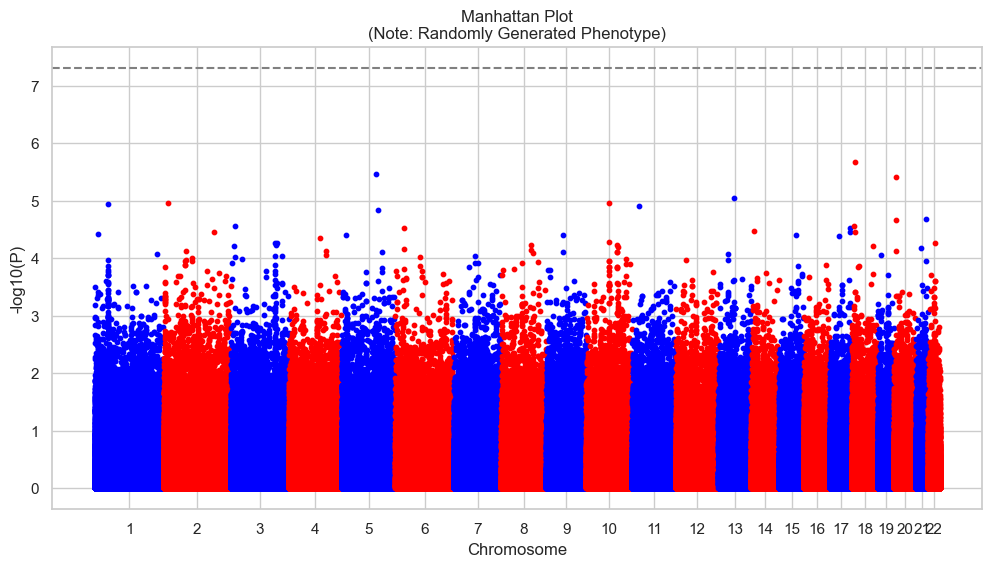

In [ ]:
# Call the plotting functions
plot_manhattan(gwas_data)

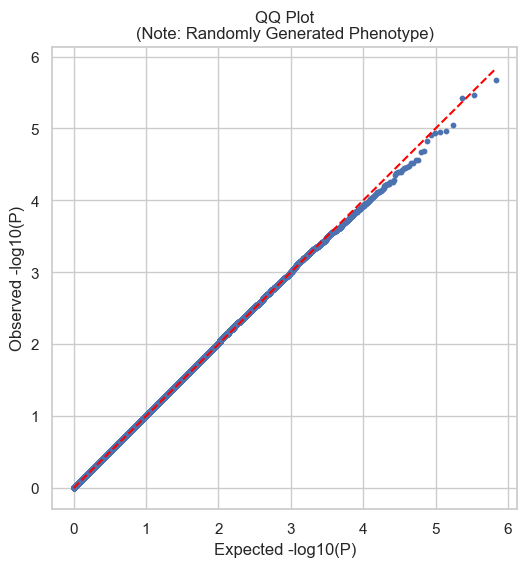

In [ ]:
plot_qq(gwas_data)

#### Linkage Disequilibrium

In [ ]:
!awk '$9 < 5e-8' results/binary_gwas_results.assoc > results/significant_snps.txt

In [45]:
!plink --bfile data/processed/chr_after_qc_complete --r2 --ld-snp-list results/significant_snps.txt --pheno data/synthetic/random_binary_phenotype.txt --allow-no-sex-flag --out results/ld_analysis

^C


##### Inspect Linkage Disequilibrium result

In [57]:
!head results/ld_analysis.ld

'head' is not recognized as an internal or external command,
operable program or batch file.


##### Filter SNPs in High LD

Extract SNP pairs with high𝑟2r2values (e.g.,𝑟2>0.8)

In [ ]:
!awk '$7 > 0.8' results/ld_analysis.ld > results/high_ld_snps.txt

##### Visualize LD

To visualize LD, you can use a heatmap or LD block plot.

In [ ]:
# Load LD data
ld_file = "results/ld_analysis.ld"
ld_data = pd.read_csv(ld_file, sep='\s+')

In [ ]:
# Pivot to create a square matrix
ld_matrix = ld_data.pivot(index='BP_A', columns='BP_B', values='R2')

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(ld_matrix, cmap='coolwarm', square=True)
plt.title("LD Heatmap")
plt.xlabel("Base Position (SNP B)")
plt.ylabel("Base Position (SNP A)")
plt.show()

##### Identify LD Blocks

Identify LD blocks using tools like Haploview or PLINK’s clumping feature

In [ ]:
!plink --bfile data/processed/chr_after_qc_complete \
--clump results/significant_snps.txt \
--clump-p1 5e-8 --clump-r2 0.8 --clump-kb 250 \
--out results/ld_blocks

#### Polygenic Risk Scoring

In [11]:
!plink --bfile data/processed/chr_after_qc_complete \
--score results/binary_gwas_results.assoc 2 4 6 header \
--pheno data/synthetic/random_binary_phenotype.txt --allow-no-sex \
--out results/prs_scores

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to results/prs_scores_2.log.
Options in effect:
  --allow-no-sex
  --bfile data/processed/chr_after_qc_complete
  --out results/prs_scores_2
  --pheno data/synthetic/random_binary_phenotype.txt
  --score results/binary_gwas_results.assoc 2 4 6 header

8095 MB RAM detected; reserving 4047 MB for main workspace.
689491 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to results/prs_scores_2.nosex .
2504 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858

In [ ]:
# Load the PRS .profile file
profile_file = "results/prs_scores.profile"  # Update with your actual .profile file path
prs_data = pd.read_csv(profile_file, sep='\s+')

# Inspect the file structure
display(prs_data.head())

,FID,IID,PHENO,CNT,CNT2,SCORE
0,HG00096,HG00096,1,1378940,341950,0.076780
1,HG00097,HG00097,2,1378932,345373,0.077382
2,HG00099,HG00099,2,1378930,341474,0.076815
3,HG00100,HG00100,2,1378926,343894,0.077151
4,HG00101,HG00101,1,1378928,342662,0.077219


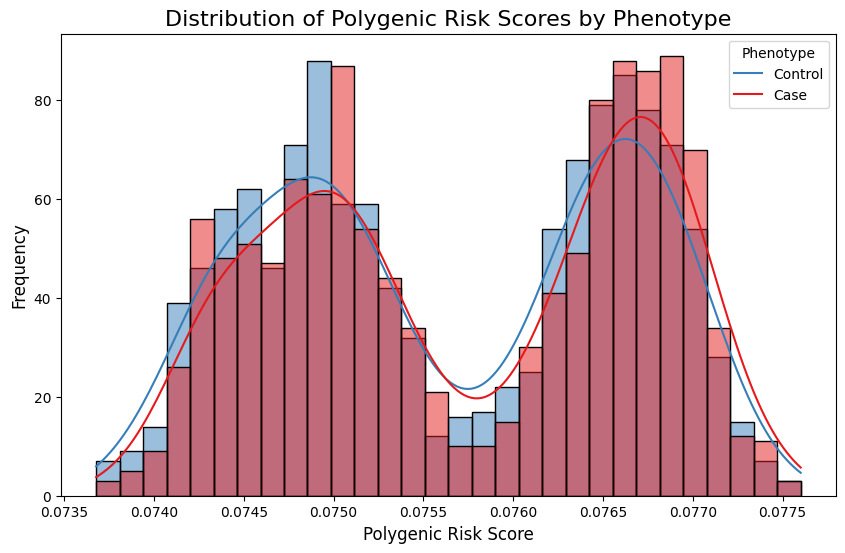

In [ ]:
# The PRS values are typically in the "SCORESUM" or "SCORE" column; confirm the correct column name
# Adjust based on the actual column name
prs_column = 'SCORE'  # Replace with the correct column name for PRS
phenotype_column = 'PHENO'  # Replace with the correct column for phenotype (case/control)

# Ensure phenotype column is categorical (e.g., 1=Control, 2=Case)
prs_data[phenotype_column] = prs_data[phenotype_column].replace({1: 'Control', 2: 'Case'})

# Plot the PRS distribution with colors for case/control
plt.figure(figsize=(10, 6))
sns.histplot(data=prs_data, x=prs_column, hue=phenotype_column, kde=True, bins=30, palette='Set1')

# Customize plot appearance
plt.title("Distribution of Polygenic Risk Scores by Phenotype", fontsize=16)
plt.xlabel("Polygenic Risk Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title='Phenotype', loc='upper right', labels=['Control', 'Case'])
plt.show()

#### GWAS Adjusted

Heritability or Genomic Inflation Factor Plot

- **Purpose**: Visualize heritability estimates or genomic inflation.
- **Data Format**: GWAS results for genomic inflation (*.assoc).

In [59]:
!plink --bfile data/processed/chr_after_qc_complete \
--pheno data/synthetic/random_binary_phenotype.txt --allow-no-sex  \
--assoc --adjust \
--out results/adjusted_gwas

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to results/adjusted_gwas.log.
Options in effect:
  --adjust
  --allow-no-sex
  --assoc
  --bfile data/processed/chr_after_qc_complete
  --out results/adjusted_gwas
  --pheno data/synthetic/random_binary_phenotype.txt

8095 MB RAM detected; reserving 4047 MB for main workspace.
689491 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to results/adjusted_gwas.nosex .
2504 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.


In [18]:
# Load GWAS results
gwas_adjusted_file = "results/adjusted_gwas.assoc"
gwas_adjusted_data = pd.read_csv(gwas_adjusted_file, sep='\s+')

In [19]:
gwas_adjusted_data.head()

,CHR,SNP,BP,A1,F_A,F_U,A2,CHISQ,P,OR
0,1,rs4970383,838555,A,0.34080,0.33160,C,0.4803,0.4883,1.0420
1,1,rs4475691,846808,T,0.25990,0.24960,C,0.6964,0.4040,1.0560
2,1,rs1806509,853954,A,0.48970,0.50160,C,0.7073,0.4004,0.9536
3,1,rs7537756,854250,G,0.21840,0.21280,A,0.2289,0.6324,1.0330
4,1,rs3748592,880238,A,0.07385,0.08441,G,1.9150,0.1664,0.8650


In [20]:
gwas_adjusted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689491 entries, 0 to 689490
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   CHR     689491 non-null  int64  
 1   SNP     689491 non-null  object 
 2   BP      689491 non-null  int64  
 3   A1      689491 non-null  object 
 4   F_A     689491 non-null  float64
 5   F_U     689491 non-null  float64
 6   A2      689491 non-null  object 
 7   CHISQ   689491 non-null  float64
 8   P       689491 non-null  float64
 9   OR      689491 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 52.6+ MB


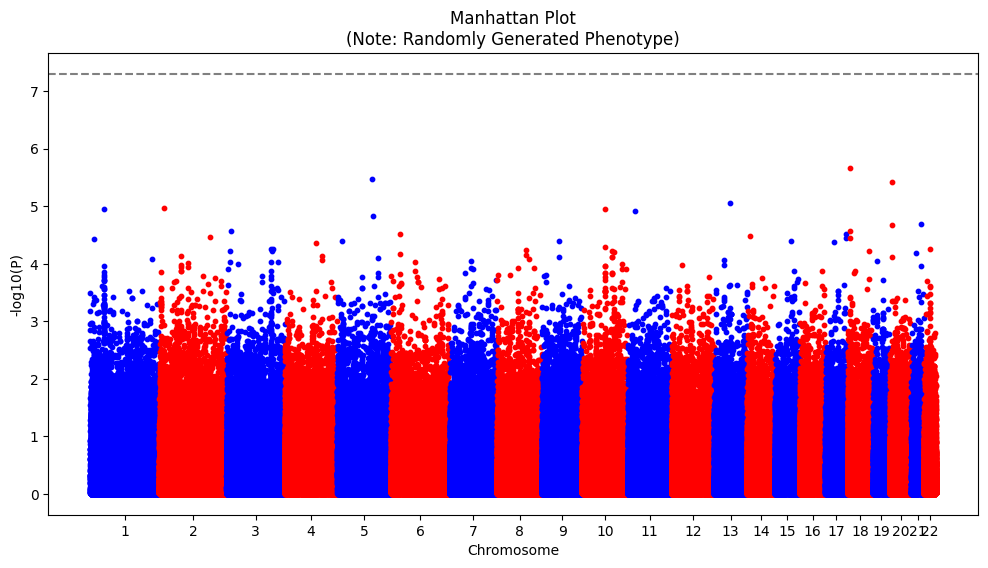

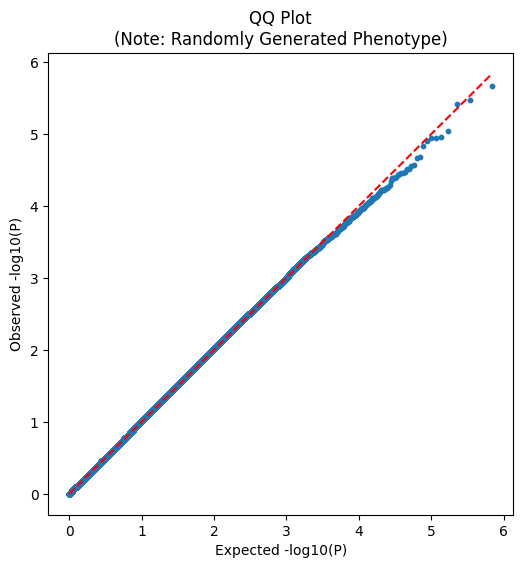

In [23]:
# Call the plotting functions
plot_manhattan(gwas_adjusted_data)
plot_qq(gwas_adjusted_data)

### GWAS on Quantitative Phenotype

In [32]:
!plink --bfile data/processed/chr_after_qc_complete \
--pheno data/synthetic/random_quantitative_phenotype.txt --allow-no-sex \
--linear --out results/quant_gwas_results

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to results/quant_gwas_results.log.
Options in effect:
  --allow-no-sex
  --bfile data/processed/chr_after_qc_complete
  --linear
  --out results/quant_gwas_results
  --pheno data/synthetic/random_quantitative_phenotype.txt

8095 MB RAM detected; reserving 4047 MB for main workspace.
689491 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to results/quant_gwas_results.nosex .
2504 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969

In [33]:
gwas_file = "results/quant_gwas_results.assoc.linear"
gwas_data = pd.read_csv(gwas_file, sep='\s+')

In [34]:
gwas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689491 entries, 0 to 689490
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   CHR     689491 non-null  int64  
 1   SNP     689491 non-null  object 
 2   BP      689491 non-null  int64  
 3   A1      689491 non-null  object 
 4   TEST    689491 non-null  object 
 5   NMISS   689491 non-null  int64  
 6   BETA    689491 non-null  float64
 7   STAT    689491 non-null  float64
 8   P       689491 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 47.3+ MB


In [37]:
gwas_data.head()

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,-log10(P),ind
0,1,rs4970383,838555,A,ADD,2504,-0.4486,-0.9915,0.32150,0.492819,0
1,1,rs4475691,846808,T,ADD,2504,-0.9406,-2.0080,0.04479,1.348819,1
2,1,rs1806509,853954,A,ADD,2504,0.4622,1.1190,0.26320,0.579714,2
3,1,rs7537756,854250,G,ADD,2504,-0.3938,-0.7730,0.43960,0.356942,3
4,1,rs3748592,880238,A,ADD,2504,1.5240,1.9180,0.05522,1.257904,4


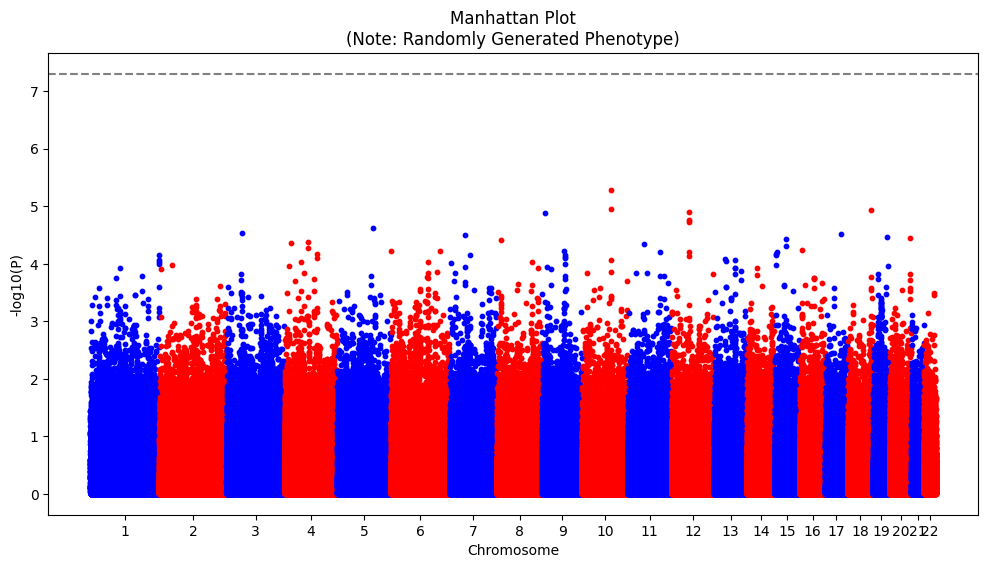

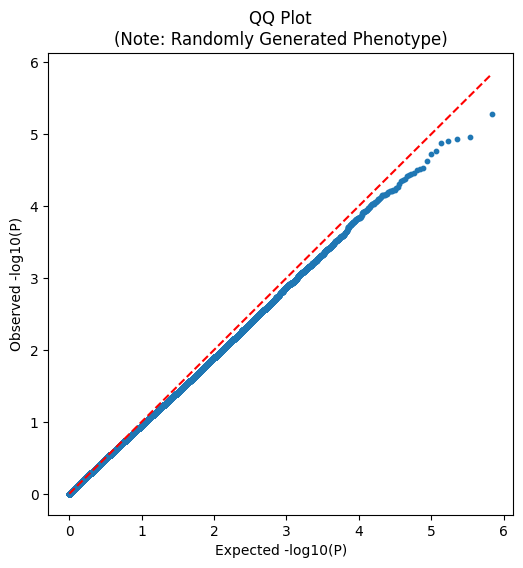

In [35]:
# Call the plotting functions
plot_manhattan(gwas_data)
plot_qq(gwas_data)

#### Polygenic Risk Scoring for Linear Model

In [38]:
!plink --bfile data/processed/chr_after_qc_complete \
--score results/quant_gwas_results.assoc.linear 2 4 6 header \
--pheno data/synthetic/random_quantitative_phenotype.txt --allow-no-sex \
--out results/quant_prs_scores

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to results/quant_prs_scores.log.
Options in effect:
  --allow-no-sex
  --bfile data/processed/chr_after_qc_complete
  --out results/quant_prs_scores
  --pheno data/synthetic/random_quantitative_phenotype.txt
  --score results/quant_gwas_results.assoc.linear 2 4 6 header

8095 MB RAM detected; reserving 4047 MB for main workspace.
689491 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to results/quant_prs_scores.nosex .
2504 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737

In [39]:
# Load the PRS .profile file
profile_file = "results/quant_prs_scores.profile"  # Update with your actual .profile file path
prs_data = pd.read_csv(profile_file, sep='\s+')

# Inspect the file structure
display(prs_data.head())

,FID,IID,PHENO,CNT,CNT2,SCORE
0,HG00096,HG00096,97.0399,1378940,341950,620.896
1,HG00097,HG00097,97.7309,1378932,345373,627.121
2,HG00099,HG00099,97.0764,1378930,341474,620.042
3,HG00100,HG00100,117.0070,1378926,343894,624.441
4,HG00101,HG00101,108.9030,1378928,342662,622.201


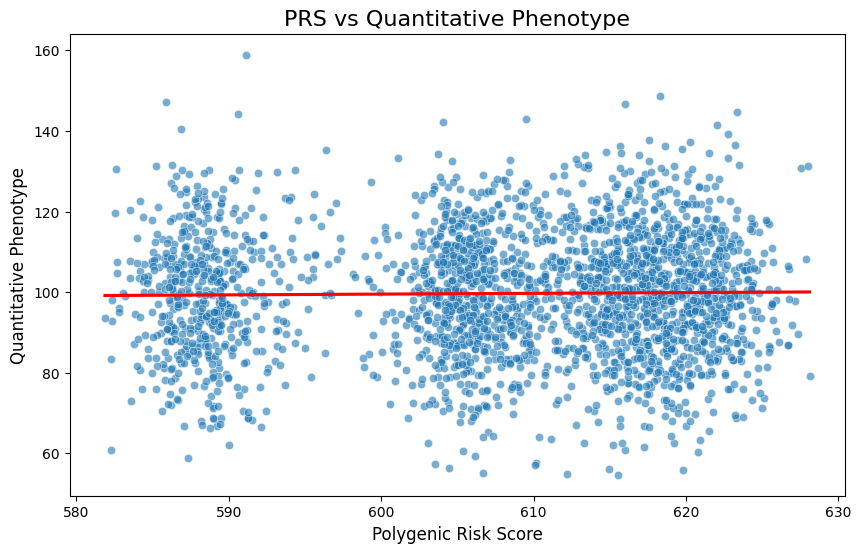

In [41]:
prs_column = 'SCORE'  # Replace with the correct column name for PRS
phenotype_column = 'PHENO'  # Replace with the correct column name for the quantitative phenotype

# Scatter plot of PRS vs quantitative phenotype
plt.figure(figsize=(10, 6))
sns.scatterplot(data=prs_data, x=prs_column, y=phenotype_column, alpha=0.6)

# Add regression line
sns.regplot(data=prs_data, x=prs_column, y=phenotype_column, scatter=False, color='red', ci=None)

# Customize plot appearance
plt.title("PRS vs Quantitative Phenotype", fontsize=16)
plt.xlabel("Polygenic Risk Score", fontsize=12)
plt.ylabel("Quantitative Phenotype", fontsize=12)
plt.show()
